# 문서 유사도 (Document Similarity)

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
import os, glob

path = '/Users/isejin/Downloads/OpinosisDataset1.0/topics'
all_files = glob.glob(os.path.join(path, '*.data'))

filename_list = []
opinions_list = []

for file_ in all_files:
    df = pd.read_table(file_, header=None, index_col=None, encoding='latin1')
    # display(df)

    # 파일명
    filename = file_.split('/')[-1]
    filename = filename.split('.')[0]
    filename_list.append(filename)

    # 의견 내용
    opinions = df.to_string(index=False, header=False)
    opinions_list.append(opinions)

document_df = pd.DataFrame({
    'filename': filename_list,
    'opinions': opinions_list
})

document_df

,filename,opinions
0,battery-life_ipod_nano_8gb,...
1,gas_mileage_toyota_camry_2007,...
2,room_holiday_inn_london,...
3,location_holiday_inn_london,...
4,staff_bestwestern_hotel_sfo,...
5,voice_garmin_nuvi_255W_gps,...
6,speed_garmin_nuvi_255W_gps,...
7,size_asus_netbook_1005ha,...
8,screen_garmin_nuvi_255W_gps,...
9,battery-life_amazon_kindle,...


In [43]:
import string
import nltk
from nltk.stem import WordNetLemmatizer

def lemmatize(text):
    # 소문자 변환
    text = text.lower()

    # 특수문자 변환 (제거)
    punc_rem_dict = dict((ord(ch), None) for ch in string.punctuation)
    text = text.translate(punc_rem_dict)

    # 토큰화
    tokens = nltk.word_tokenize(text)

    # 어근 분리
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token, pos='v') for token in tokens]

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(
    tokenizer=lemmatize,
    stop_words='english',
    ngram_range=(1, 2),
    max_df=0.85,
    min_df=0.05
)
opinions_vecs = tfidf_vectorizer.fit_transform(document_df['opinions'])

/usr/local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['make'] not in stop_words.
  warnings.warn(


In [45]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, max_iter=5000, random_state=0)
document_df['cluster'] = kmeans.fit_predict(opinions_vecs)
document_df

,filename,opinions,cluster
0,battery-life_ipod_nano_8gb,...,1
1,gas_mileage_toyota_camry_2007,...,2
2,room_holiday_inn_london,...,3
3,location_holiday_inn_london,...,0
4,staff_bestwestern_hotel_sfo,...,3
5,voice_garmin_nuvi_255W_gps,...,1
6,speed_garmin_nuvi_255W_gps,...,1
7,size_asus_netbook_1005ha,...,1
8,screen_garmin_nuvi_255W_gps,...,1
9,battery-life_amazon_kindle,...,1


In [46]:
hotel_index = document_df[document_df['cluster'] == 1].index
print(hotel_index.shape)
print(hotel_index)

base_index = 1
document_df.iloc[base_index]

(24,)
Index([ 0,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 19, 21, 24, 25, 26, 33, 34,
       36, 37, 38, 40, 44, 48],
      dtype='int64')


filename                        gas_mileage_toyota_camry_2007
opinions                                                  ...
cluster                                                     2
Name: 1, dtype: object

In [47]:
from sklearn.metrics.pairwise import cosine_similarity

# print(opinions_vecs[base_index].shape, opinions_vecs.shape)
opinions_sim = cosine_similarity(opinions_vecs[base_index], opinions_vecs)
opinions_sim

array([[0.00617745, 1.        , 0.01655907, 0.01094342, 0.00602421,
        0.01268762, 0.01163344, 0.01691668, 0.01333093, 0.00828446,
        0.00915797, 0.00838257, 0.00877177, 0.0144262 , 0.00565291,
        0.03233774, 0.0130667 , 0.00642447, 0.16274038, 0.00774328,
        0.00554933, 0.01166003, 0.0865878 , 0.08341825, 0.01302325,
        0.01027204, 0.00679485, 0.01576924, 0.01526339, 0.07042111,
        0.01446425, 0.00753869, 0.00888814, 0.02055643, 0.01660099,
        0.96371689, 0.00764481, 0.00920648, 0.00804405, 0.0116149 ,
        0.01124696, 0.01739415, 0.14560356, 0.27442494, 0.00533985,
        0.05542298, 0.01603456, 0.20396172, 0.01103352, 0.00492599,
        0.02225328]])

In [48]:
opinion_sorted_idx = opinions_sim.argsort()[:, ::-1] # 내림차순 정렬 (유사도 높은순)
opinion_sorted_idx = opinion_sorted_idx[:, 1:]       # 자기자신 제외
opinion_sorted_idx = opinion_sorted_idx.reshape(-1)  # 1차원으로 변형

result_df = document_df.iloc[opinion_sorted_idx][['filename', 'cluster']]
opinions_sim = opinions_sim.reshape(-1)
result_df['similarity'] = opinions_sim[opinion_sorted_idx]
result_df

,filename,cluster,similarity
35,mileage_honda_accord_2008,2,0.963717
43,comfort_toyota_camry_2007,2,0.274425
47,performance_honda_accord_2008,2,0.203962
18,comfort_honda_accord_2008,2,0.162740
42,quality_toyota_camry_2007,2,0.145604
22,interior_toyota_camry_2007,2,0.086588
23,transmission_toyota_camry_2007,2,0.083418
29,seats_honda_accord_2008,2,0.070421
45,interior_honda_accord_2008,2,0.055423
15,performance_netbook_1005ha,1,0.032338


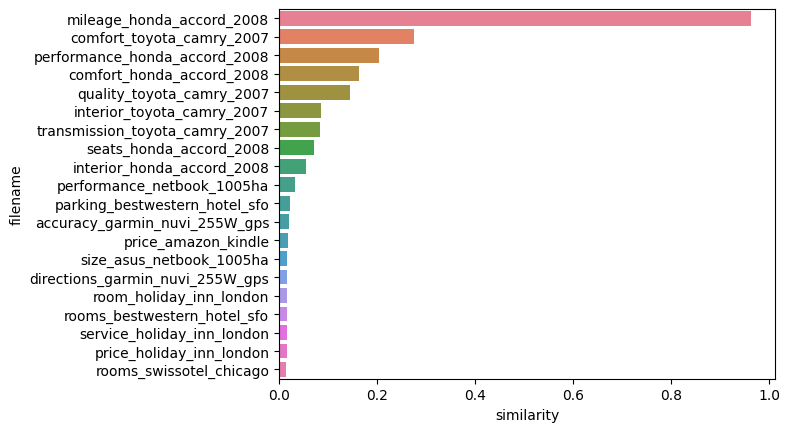

In [49]:
sns.barplot(x='similarity', y='filename', data=result_df.iloc[:20], hue='filename')
plt.show()

/var/folders/kp/5_0zhw410tzf9tkb2lt76sw40000gn/T/ipykernel_20591/2186247282.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_sim_df['similarity'] = target_sim_val


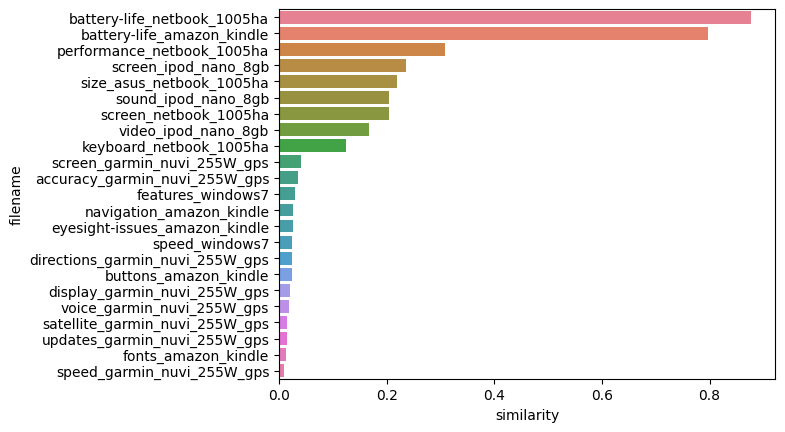

In [ ]:
# 호텔관련 리뷰 추출 (A)
hotel_idx = document_df[document_df['cluster'] == 1].index
# print(hotel_idx)

# A에서 기준이 될 문서로 0번째 문서 지정
base_idx = hotel_idx[0]
# document_df.iloc[base_idx]


# 호텔 관련 리뷰 중 유사도 높은 순으로 정렬
target_sim = cosine_similarity(opinions_vecs[base_idx], opinions_vecs[hotel_idx])
target_sim_sorted_idx = target_sim.argsort()[:, ::-1]
target_sim_sorted_idx = target_sim_sorted_idx[:, 1:]     # 나 자신 제외

hotel_sorted_idx = hotel_idx[target_sim_sorted_idx.reshape(-1)]     # 파일 이름을 뜯어오기 위해서 정렬을 시켜줌 (document에서 가져오기 위함)


target_sim_val = np.sort(target_sim.reshape(-1))[::-1]  # 유사도를 구해주는 변수
target_sim_val = target_sim_val[1:]

hotel_sim_df = document_df.iloc[hotel_sorted_idx]
hotel_sim_df['similarity'] = target_sim_val

# 시각화
sns.barplot(x='similarity', y='filename', data=hotel_sim_df, hue='filename')
plt.show()